In [3]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import umap

In [5]:
file_path = 'Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

features_for_umap = [
    'Daily Mean PM2.5 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'Percent Complete',
    'Site Latitude',
    'Site Longitude'
]

X = data[features_for_umap].copy()

# Handle missing values (filling with mean for simplicity)
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 1200x1000 with 0 Axes>

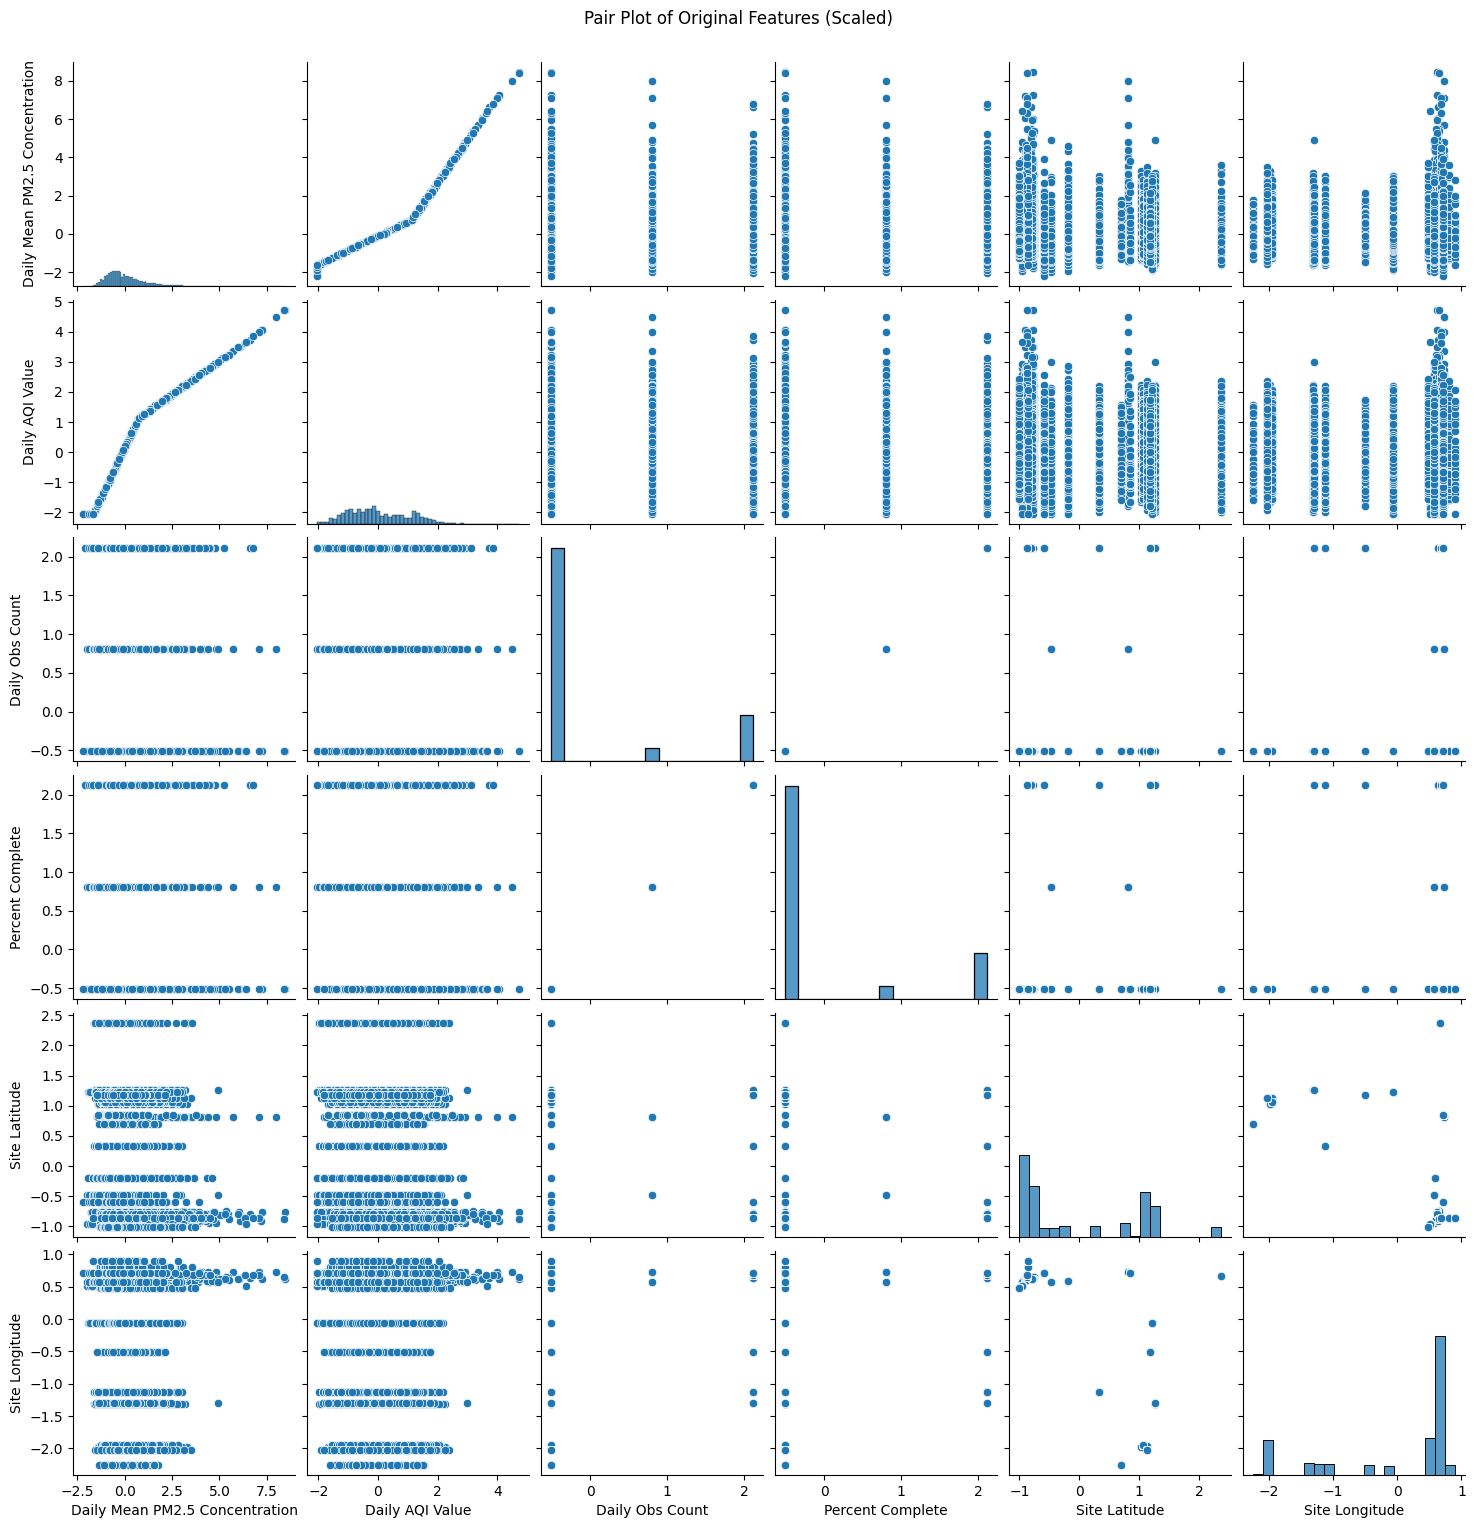

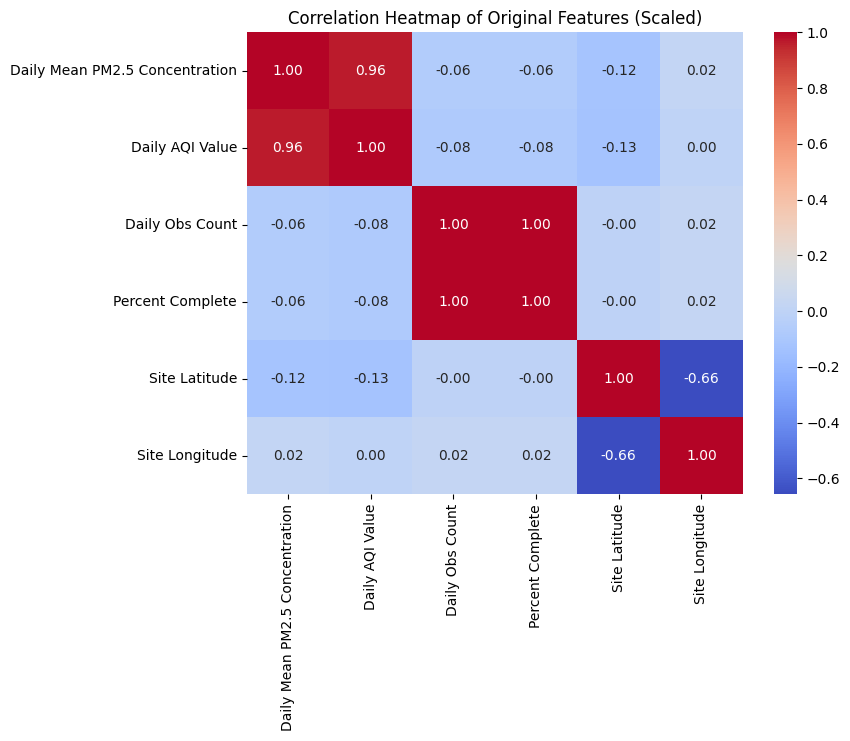

In [6]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_umap)

# Pair Plot
plt.figure(figsize=(12, 10))
sns.pairplot(X_scaled_df)
plt.suptitle('Pair Plot of Original Features (Scaled)', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features (Scaled)')
plt.show()

In [9]:
n_components_umap = 2 # Reduce to 2 dimensions for visualization
reducer = umap.UMAP(n_components=n_components_umap, random_state=0) # You can adjust parameters like n_neighbors, min_dist

X_umap = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


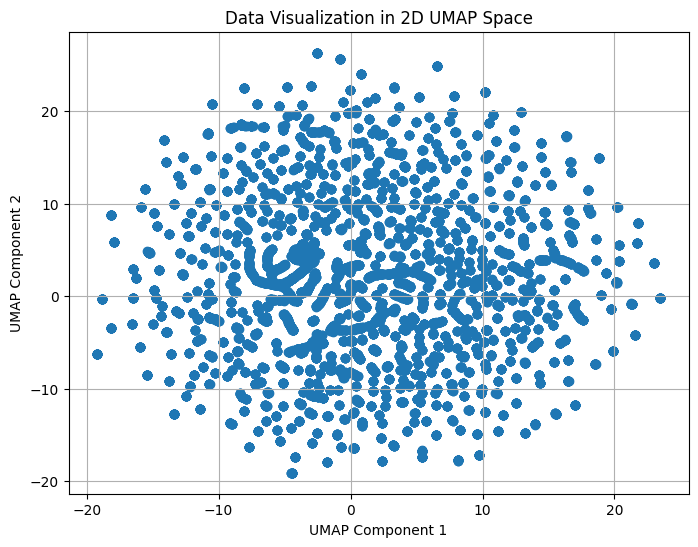

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1]) # UMAP Component 1 vs Component 2
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Data Visualization in 2D UMAP Space')
plt.grid(True)
plt.show()

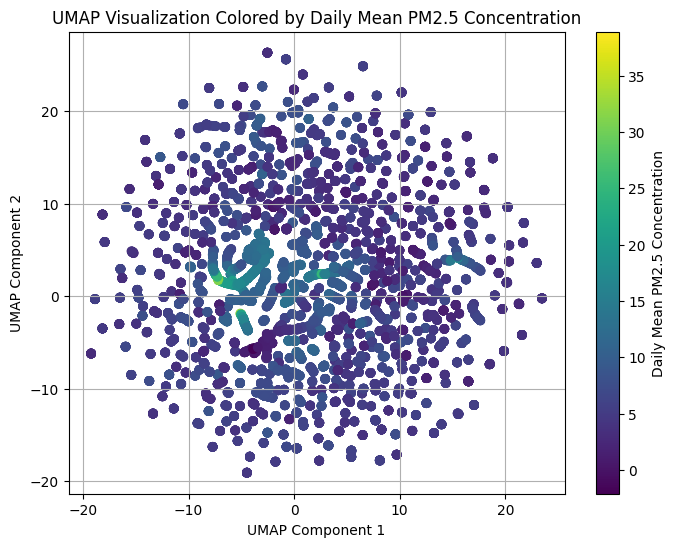

In [11]:
# Example: Color points by 'Daily Mean PM2.5 Concentration'
feature_to_color = data['Daily Mean PM2.5 Concentration'] # Choose feature to color by

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=feature_to_color, cmap='viridis') # Use a colormap
plt.colorbar(scatter, label='Daily Mean PM2.5 Concentration') # Add colorbar with feature label
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization Colored by Daily Mean PM2.5 Concentration')
plt.grid(True)
plt.show()